Comparison between original bathy and smoothed bathy

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from salishsea_tools import viz_tools
import scipy.io as sio

%matplotlib inline

Load original bathy

In [2]:
#needed to rever this file to change set 4d192eb06a81
orig_bathy = nc.Dataset('../../NEMO-forcing/grid/bathy_meter_SalishSea_orig.nc', 'r')
orig_depths = orig_bathy.variables['Bathymetry']

In [3]:
bathy = nc.Dataset('../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc', 'r')
depths = bathy.variables['Bathymetry']
nav_lat=bathy.variables['nav_lat'][:]
nav_lon=bathy.variables['nav_lon'][:]

Thalweg points

In [4]:
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt',delimiter=" ", unpack=False)
lines = lines.astype(int)

(300, 500)

/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


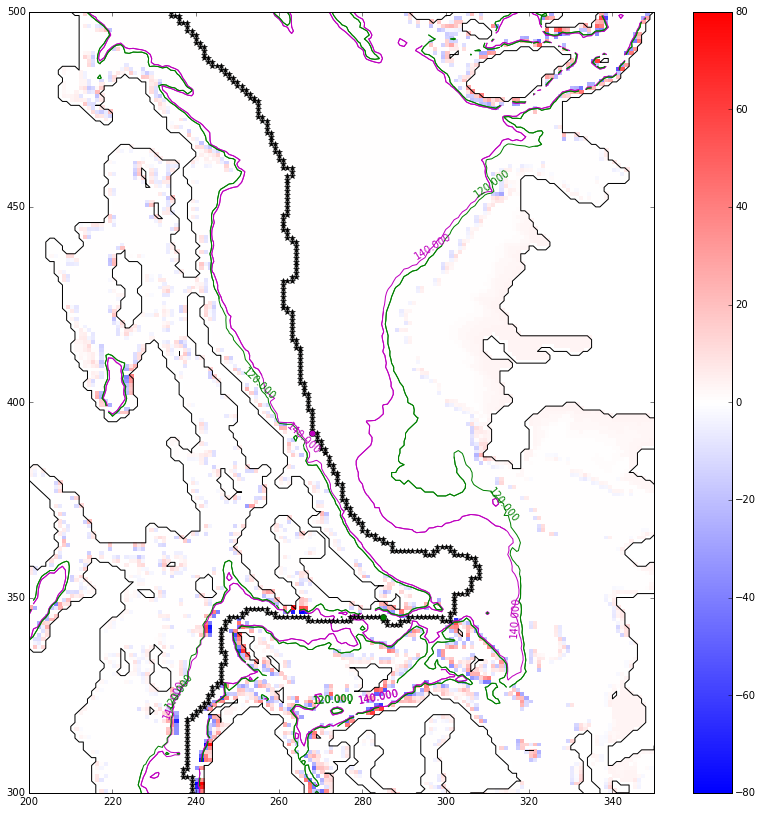

In [5]:
fig,ax=plt.subplots(1,1,figsize=(14, 14))

#countour depth
d=140
d2=120
#coloured point
p=580
p2=700

diffs = orig_depths[:] - depths[:]
mesh = ax.pcolormesh(-diffs, cmap=plt.cm.bwr, vmin=-80, vmax=80)
fig.colorbar(mesh,ax=ax)
viz_tools.plot_coastline(ax,bathy)
ax.plot(lines[:,1],lines[:,0],'*k')
ax.plot(lines[p,1],lines[p,0],'og')
ax.plot(lines[p2,1],lines[p2,0],'om')
c=ax.contour(depths[:],[d,d],colors='m')
ax.clabel(c, inline=True)
c=ax.contour(depths[:],[d2,d2],colors='green')
ax.clabel(c, inline=True)
ax.set_xlim([200,350])
ax.set_ylim([300,500])

Plot thalweg

(400, 800)

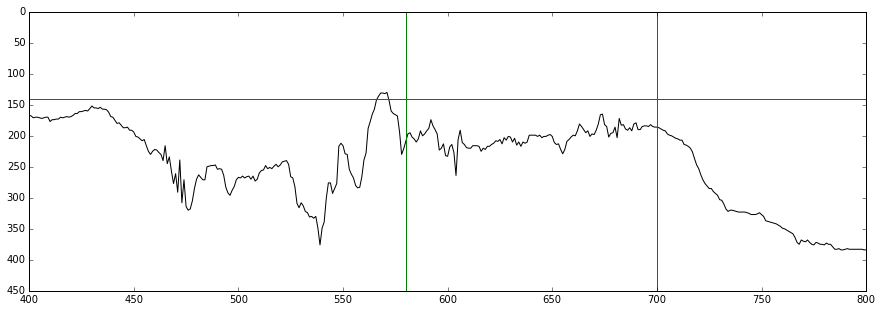

In [6]:
fig,ax=plt.subplots(1,1,figsize=(15,5))

ax.plot(depths[lines[:,0],lines[:,1]],'k')
ax.invert_yaxis()
ax.plot([0,1400],[d,d],'-r')
ax.plot([p,p],[0,450],'-g')
ax.plot([p2,p2],[0,450],'-g')
ax.set_xlim([400,800])

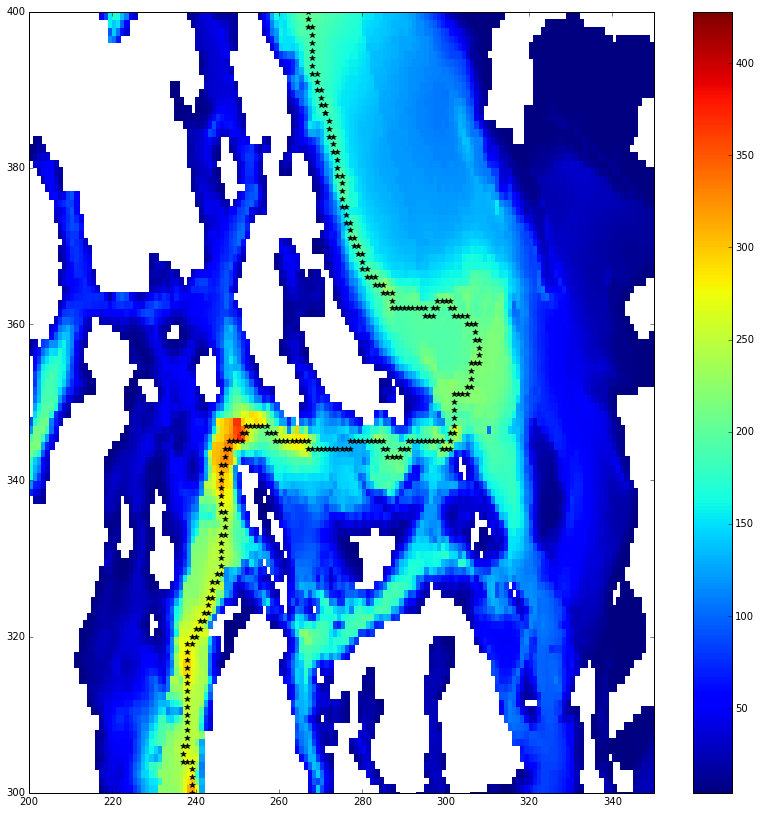

In [7]:
fig,ax=plt.subplots(1,1,figsize=(14, 14))



mesh = ax.pcolormesh(depths[:])
ax.set_xlim([200,350])
ax.set_ylim([300,400])
fig.colorbar(mesh,ax=ax)
ax.plot(lines[:,1],lines[:,0],'*k')

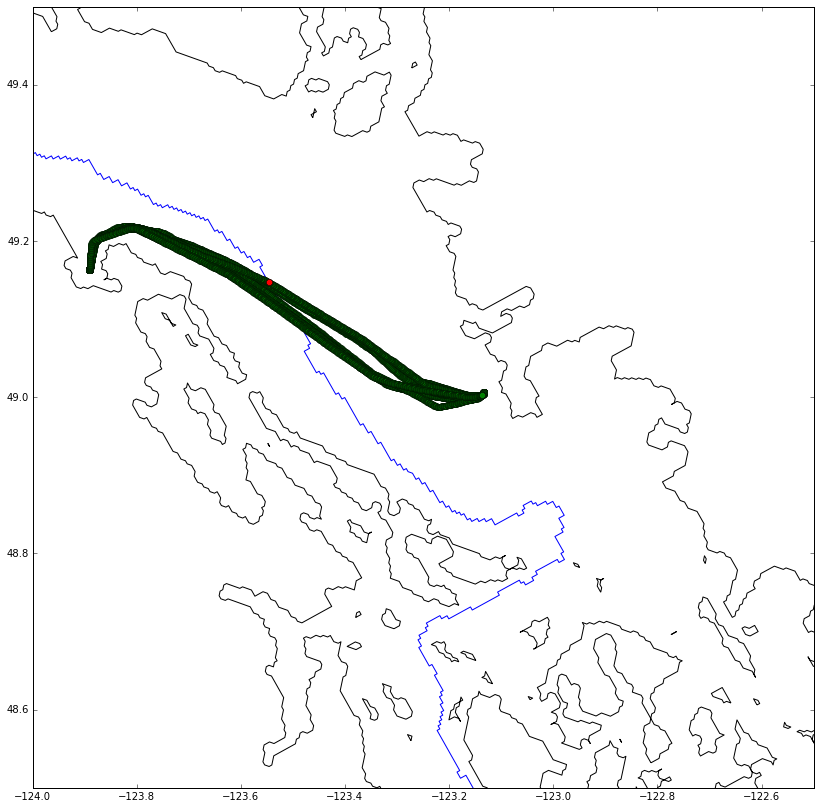

In [8]:
fig,ax=plt.subplots(1,1,figsize=(14, 14))

ax.plot(nav_lon[lines[:,0],lines[:,1]],nav_lat[lines[:,0],lines[:,1]])
viz_tools.plot_coastline(ax,bathy,coords='map')
ax.set_xlim([-124,-122.5])
ax.set_ylim([48.5,49.5])

#ferry
saline=sio.loadmat('/ocean/jieliu/research/meopar\
/autodataupdate/ferrydata/SBE1920150518.mat')     
data=saline['ferryData']['data'][0,0]
time=data['matlabtime'][0,0]
lonn=data['Longitude'][0,0]
latt=data['Latitude'][0,0]

ax.plot(lonn,latt,'o')
cross=775
ax.plot(nav_lon[lines[cross,0],lines[cross,1]],nav_lat[lines[cross,0],lines[cross,1]],'or')

Ferry crosses thaleg at about -123.5. This is about thalweg point 775.